In [641]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

# Preprocessing

In [642]:
data_netto = pd.read_csv('netto.txt', sep=" ", dtype={'weekday': np.int32, 'h': np.float32, 'visit': np.float32})
data_penny = pd.read_csv('penny.txt', sep=" ", dtype={'weekday': np.int32, 'h': np.float32, 'visit': np.float32})
data = pd.read_csv('features_normalized.csv')
data_tankstelle = pd.read_csv('tankstelle.txt', sep=" ", dtype={'weekday': np.int32, 'h': np.float32, 'visit': np.float32})

In [643]:
data_netto.head()

weekday     h  visit
0        1   7.0    0.4
1        1   8.0    0.6
2        1   9.0    0.8
3        1  10.0    1.0
4        1  11.0    1.2

In [644]:
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Tourism', 'Cloud', 'Rain', 'datum', 'y', 'm', 'd'], axis=1)

In [645]:
data.head()

h         1         2         3         4     count  prozent1  prozent2  \
0  0 -0.801653 -1.260945 -1.048941 -1.025500 -1.267660 -0.940267  2.029124   
1  1 -0.675183 -1.260945 -1.048941 -1.025500 -1.255341  2.394390 -0.400399   
2  2 -0.738418 -1.238170 -1.048941 -1.025500 -1.243022  0.423911  1.035228   
3  3 -0.422243 -1.162255 -0.903151 -1.025500 -1.132149  2.164414 -1.363831   
4  4  0.336576 -0.600481 -0.708764  0.105254 -0.540827  1.220591 -0.682224   

   prozent3  prozent4  weekday  
0 -1.473891 -0.908098        6  
1 -1.473891 -0.908098        6  
2 -1.473891 -0.908098        6  
3  0.071007 -0.908098        6  
4 -0.637586  0.889698        6

# Correlation Shopping at 'Netto' Supermarket

In [646]:
result_netto = pd.merge(data, data_netto, on=['weekday', 'h'])

In [647]:
result_netto.head()

h         1         2         3         4     count  prozent1  prozent2  \
0  7  1.158631  0.788770  0.700539  0.670631  0.863563  0.377537 -0.324692   
1  7 -0.232538  0.955784  0.797732  1.424466  0.900521 -0.564073  0.201906   
2  7  2.549801  0.690080  0.311766  0.105254  0.851244  1.325590 -0.680729   
3  7  1.854216  0.272546  0.457555  1.047548  0.493987  1.210758 -1.105210   
4  7  0.652751 -0.327186 -0.514377  0.105254 -0.263645  1.089951 -0.543312   

   prozent3  prozent4  weekday  visit  
0  0.049125  0.046822        6    0.3  
1  0.106868  0.448178        6    0.3  
2 -0.282574 -0.267857        6    0.3  
3  0.106158  0.498028        6    0.3  
4 -0.507572  0.413811        6    0.3

In [648]:
data_weekday_stats_netto = result_netto.groupby(['weekday', 'h']).describe()
data_weekday_stats_netto.head()

1                                                              \
           count      mean       std       min       25%       50%       75%   
weekday h                                                                      
1       7   35.0  0.450399  1.174918 -0.801653 -0.517096 -0.169303  1.190249   
        8   35.0  1.418798  1.834441 -0.738418 -0.074451  0.589516  3.087298   
        9   35.0  1.931905  2.373435 -0.675183 -0.106068  0.652751  4.541703   
        10  35.0  1.716906  2.235667 -0.611948 -0.232538  0.842456  3.340238   
        11  35.0  1.725939  2.214791 -0.738418 -0.169303  0.589516  3.403473   

                         2           ...   prozent4           visit            \
                 max count      mean ...        75%       max count mean  std   
weekday h                            ...                                        
1       7   2.929211  35.0 -0.502658 ...  -0.370467  0.262342  35.0  0.4  0.0   
        8   5.015965  35.0 -0.225459 ...  -0.292888 -0.034169  35.0  0.6  0.0   
        9   6.027725  35.0  0.045450 ...  -0.219023  0.149927  35.0  0.8  0.0   
        10  6.470369  35.0  0.116594 ...  -0.332765 -0.115419  35.0  1.0  0.0   
        11  6.660074  35.0  0.203354 ...  -0.315913 -0.163977  35.0  1.2  0.0   

                                     
            min  25%  50%  75%  max  
weekday h                            
1       7   0.4  0.4  0.4  0.4  0.4  
        8   0.6  0.6  0.6  0.6  0.6  
        9   0.8  0.8  0.8  0.8  0.8  
        10  1.0  1.0  1.0  1.0  1.0  
        11  1.2  1.2  1.2  1.2  1.2  

[5 rows x 80 columns]

In [649]:
# correlation map, no processing needed
#f,ax = plt.subplots(figsize=(18, 18))
#sns.heatmap(data_weekday_stats_netto.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
#plt.show()

In [650]:
#list(data_weekday_stats_netto)

In [651]:
data_means_netto = data_weekday_stats_netto[[('1', 'mean'),('2', 'mean'), ('3', 'mean'), ('4', 'mean'),('count', 'mean'), ('prozent1', 'mean'), ('prozent2', 'mean'), ('prozent3', 'mean'), ('prozent4', 'mean'), ('visit', 'mean')]]

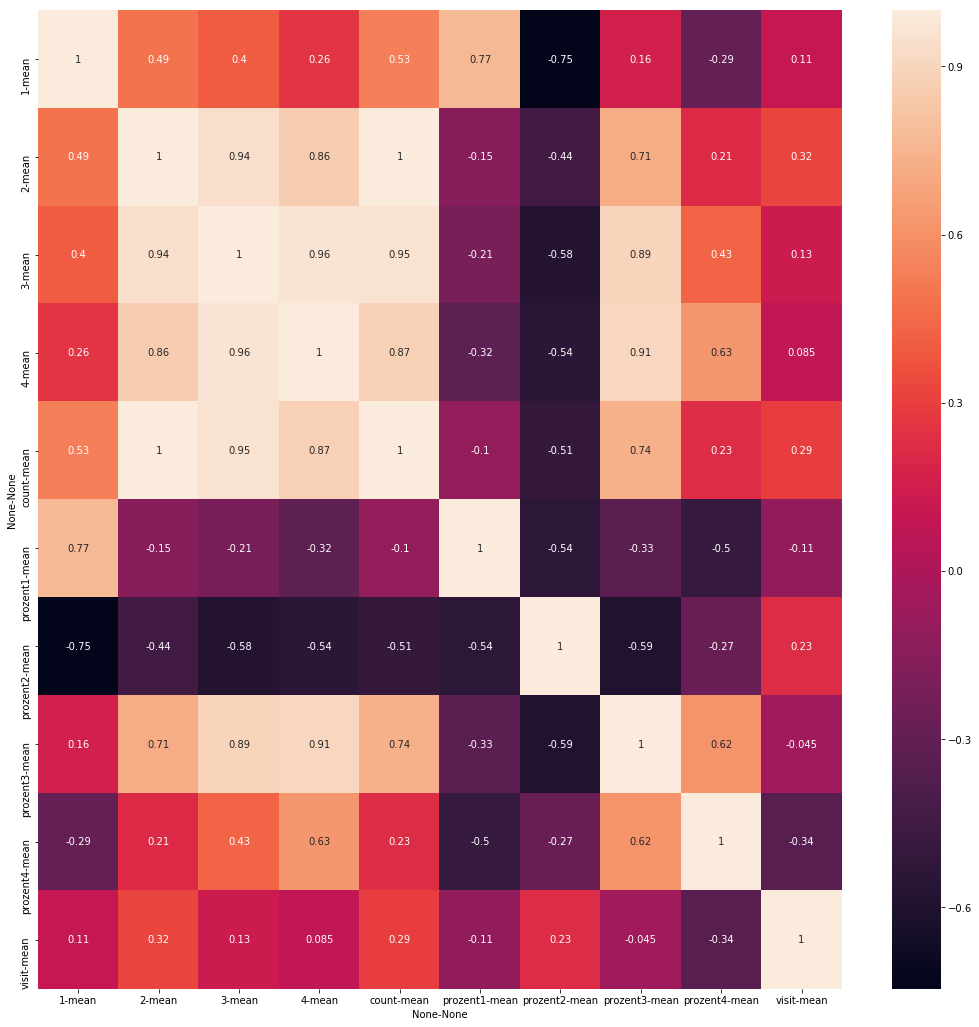

In [652]:
# correlation map, no processing needed
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_means_netto.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
plt.show()

Already reached a correlation with pearson coefficient 0.32.

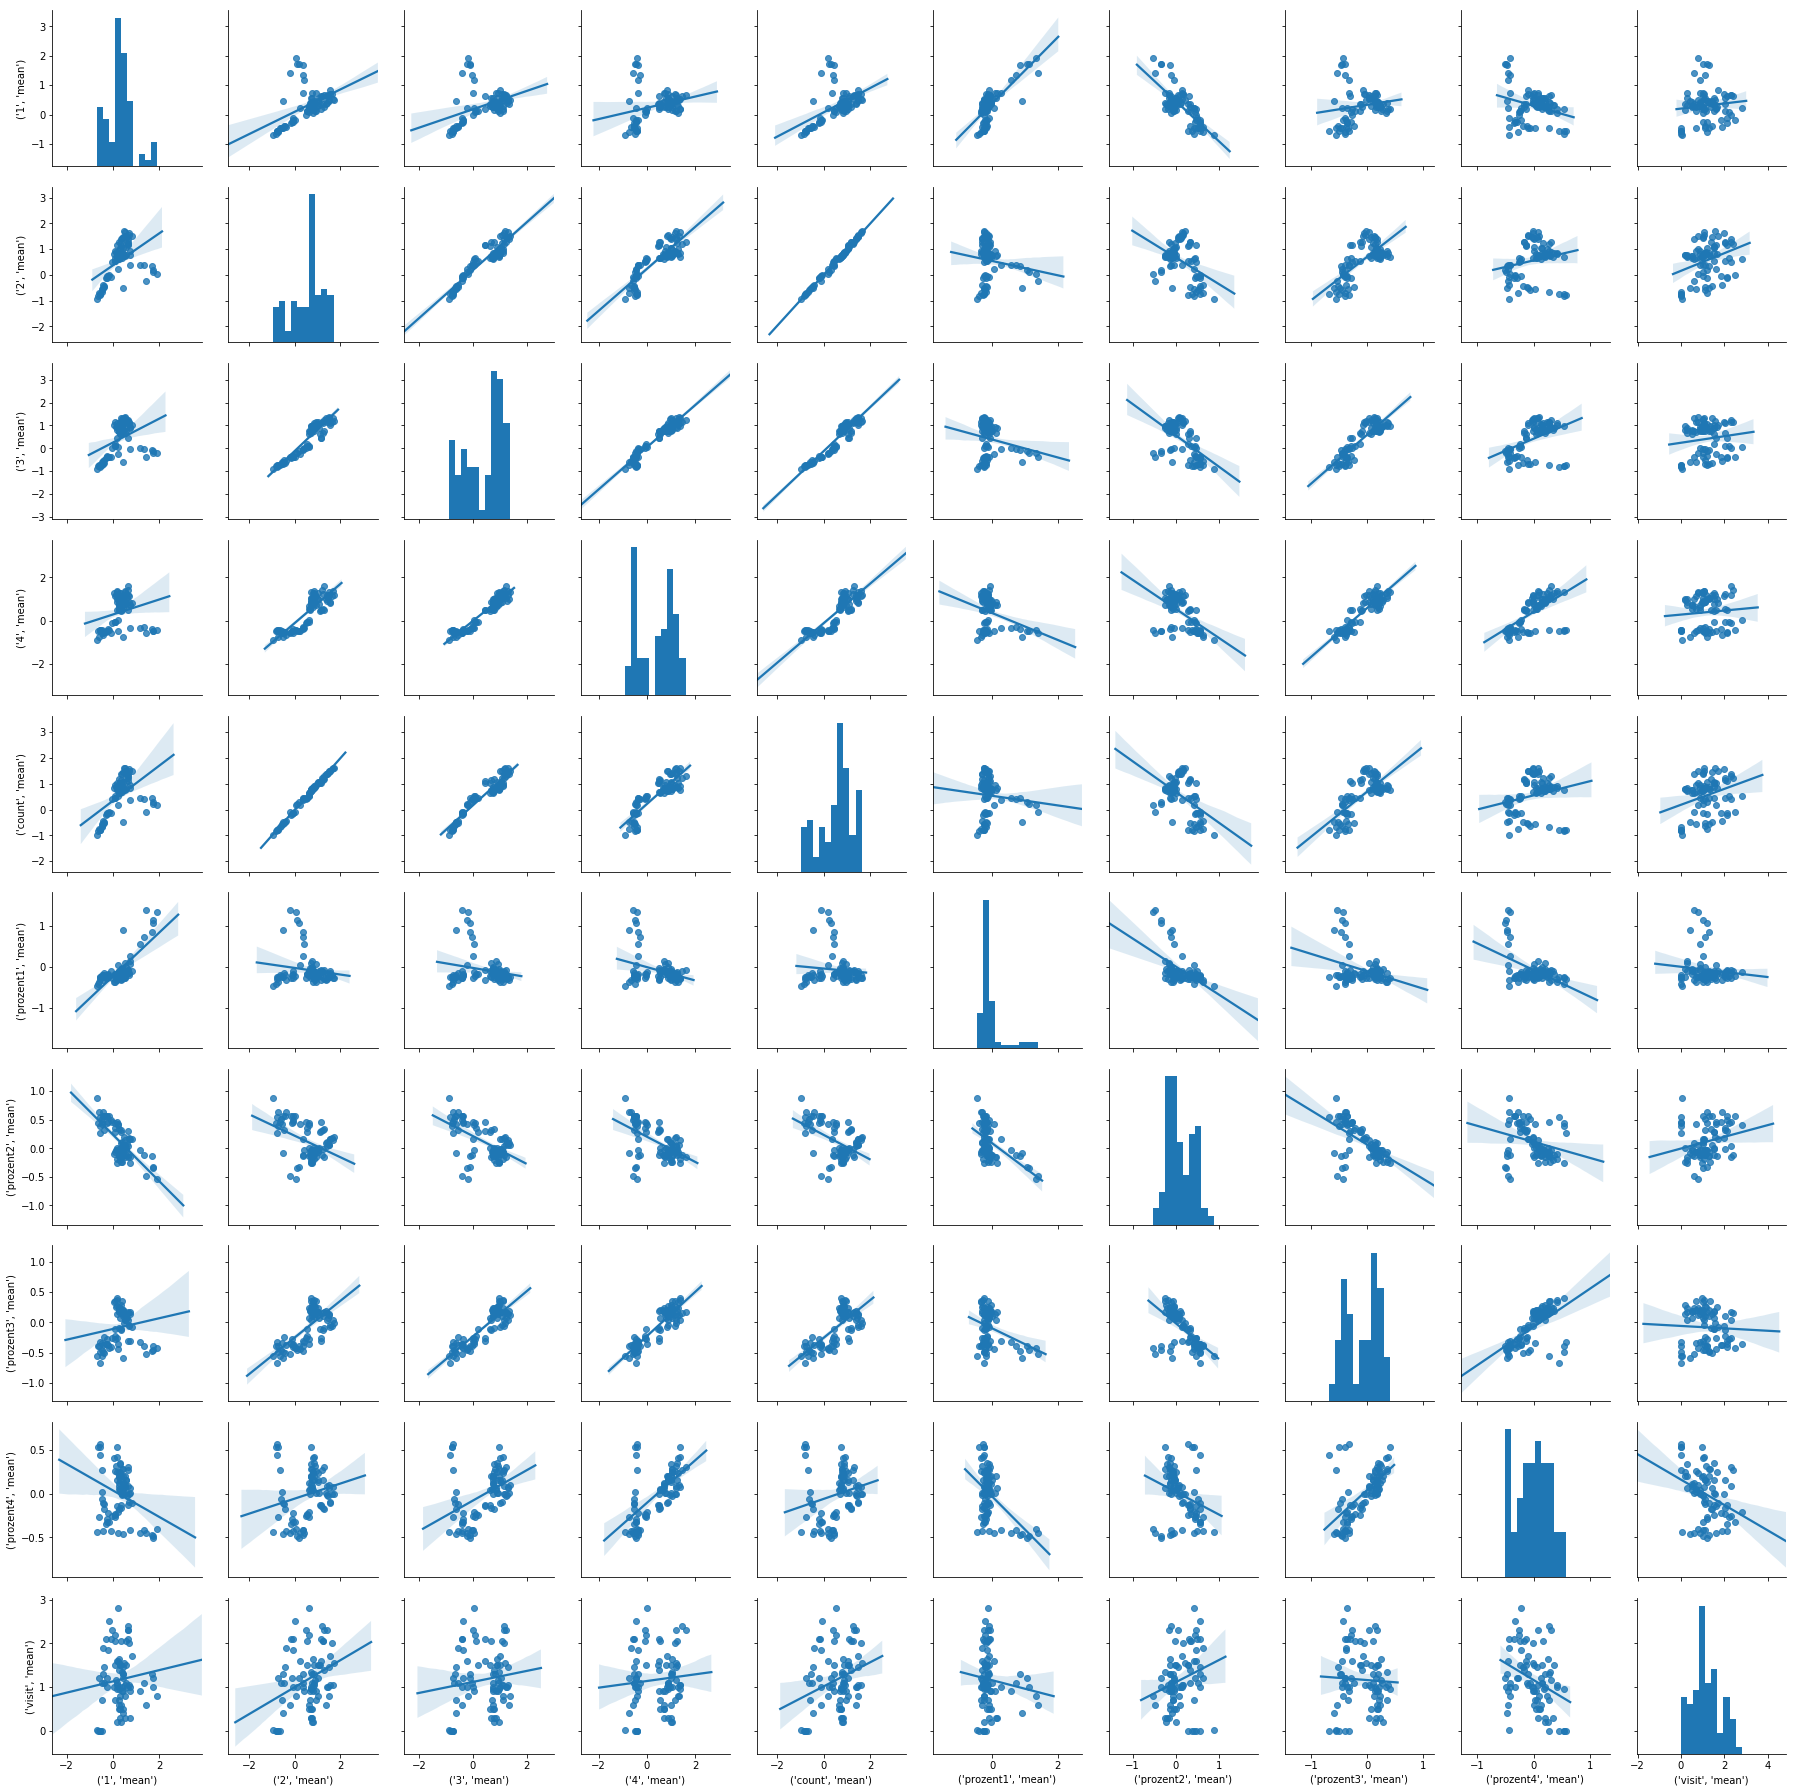

In [653]:
sns.pairplot(data_means_netto, kind="reg")
plt.show()

# Correlation Shopping at 'Penny' Supermarket

In [654]:
result_penny = pd.merge(data, data_penny, on=['weekday', 'h'])

In [655]:
data_weekday_stats_penny = result_penny.groupby(['weekday', 'h']).describe()
data_weekday_stats_penny.head()

1                                                              \
           count      mean       std       min       25%       50%       75%   
weekday h                                                                      
1       7   35.0  0.450399  1.174918 -0.801653 -0.517096 -0.169303  1.190249   
        8   35.0  1.418798  1.834441 -0.738418 -0.074451  0.589516  3.087298   
        9   35.0  1.931905  2.373435 -0.675183 -0.106068  0.652751  4.541703   
        10  35.0  1.716906  2.235667 -0.611948 -0.232538  0.842456  3.340238   
        11  35.0  1.725939  2.214791 -0.738418 -0.169303  0.589516  3.403473   

                         2           ...   prozent4           visit            \
                 max count      mean ...        75%       max count mean  std   
weekday h                            ...                                        
1       7   2.929211  35.0 -0.502658 ...  -0.370467  0.262342  35.0  0.4  0.0   
        8   5.015965  35.0 -0.225459 ...  -0.292888 -0.034169  35.0  0.6  0.0   
        9   6.027725  35.0  0.045450 ...  -0.219023  0.149927  35.0  1.0  0.0   
        10  6.470369  35.0  0.116594 ...  -0.332765 -0.115419  35.0  1.3  0.0   
        11  6.660074  35.0  0.203354 ...  -0.315913 -0.163977  35.0  1.5  0.0   

                                     
            min  25%  50%  75%  max  
weekday h                            
1       7   0.4  0.4  0.4  0.4  0.4  
        8   0.6  0.6  0.6  0.6  0.6  
        9   1.0  1.0  1.0  1.0  1.0  
        10  1.3  1.3  1.3  1.3  1.3  
        11  1.5  1.5  1.5  1.5  1.5  

[5 rows x 80 columns]

In [656]:
data_means_penny = data_weekday_stats_penny[[('1', 'mean'),('2', 'mean'), ('3', 'mean'), ('4', 'mean'),('count', 'mean'), ('prozent1', 'mean'), ('prozent2', 'mean'), ('prozent3', 'mean'), ('prozent4', 'mean'), ('visit', 'mean')]]

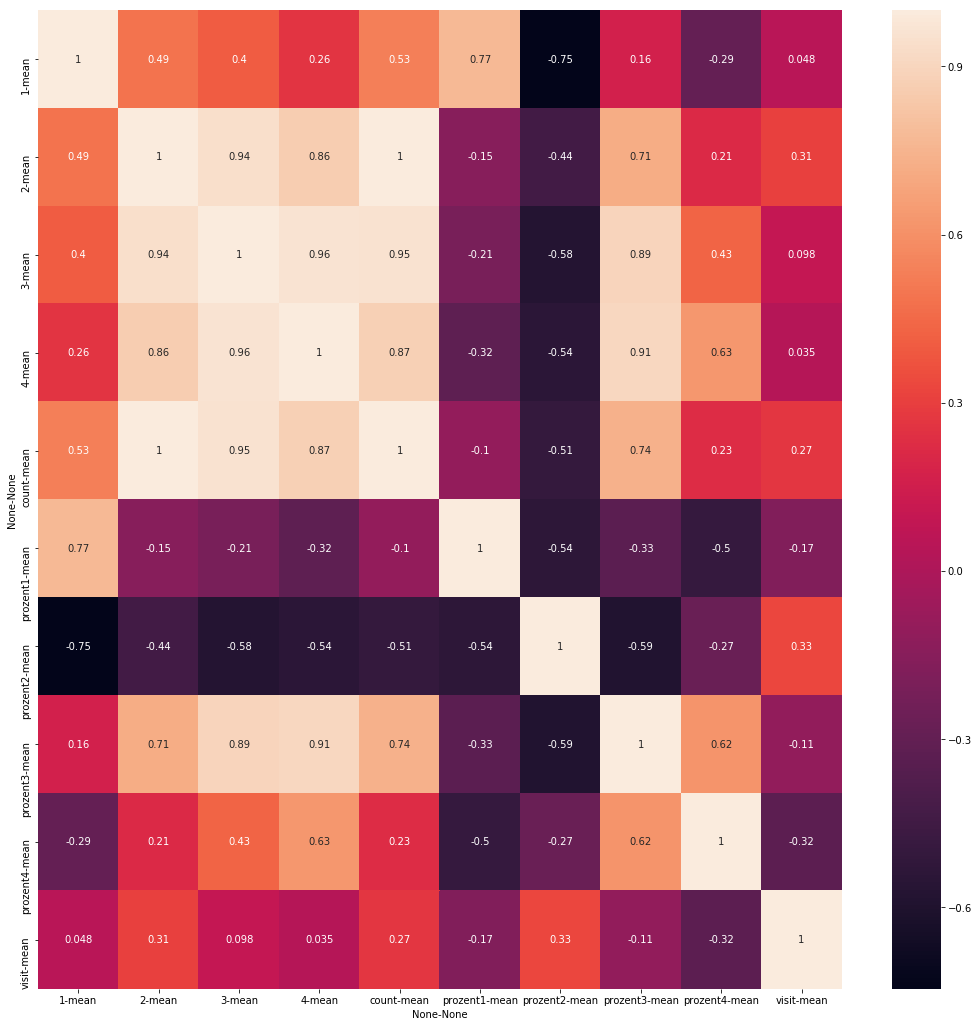

In [657]:
# correlation map, no processing needed
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_means_penny.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
plt.show()

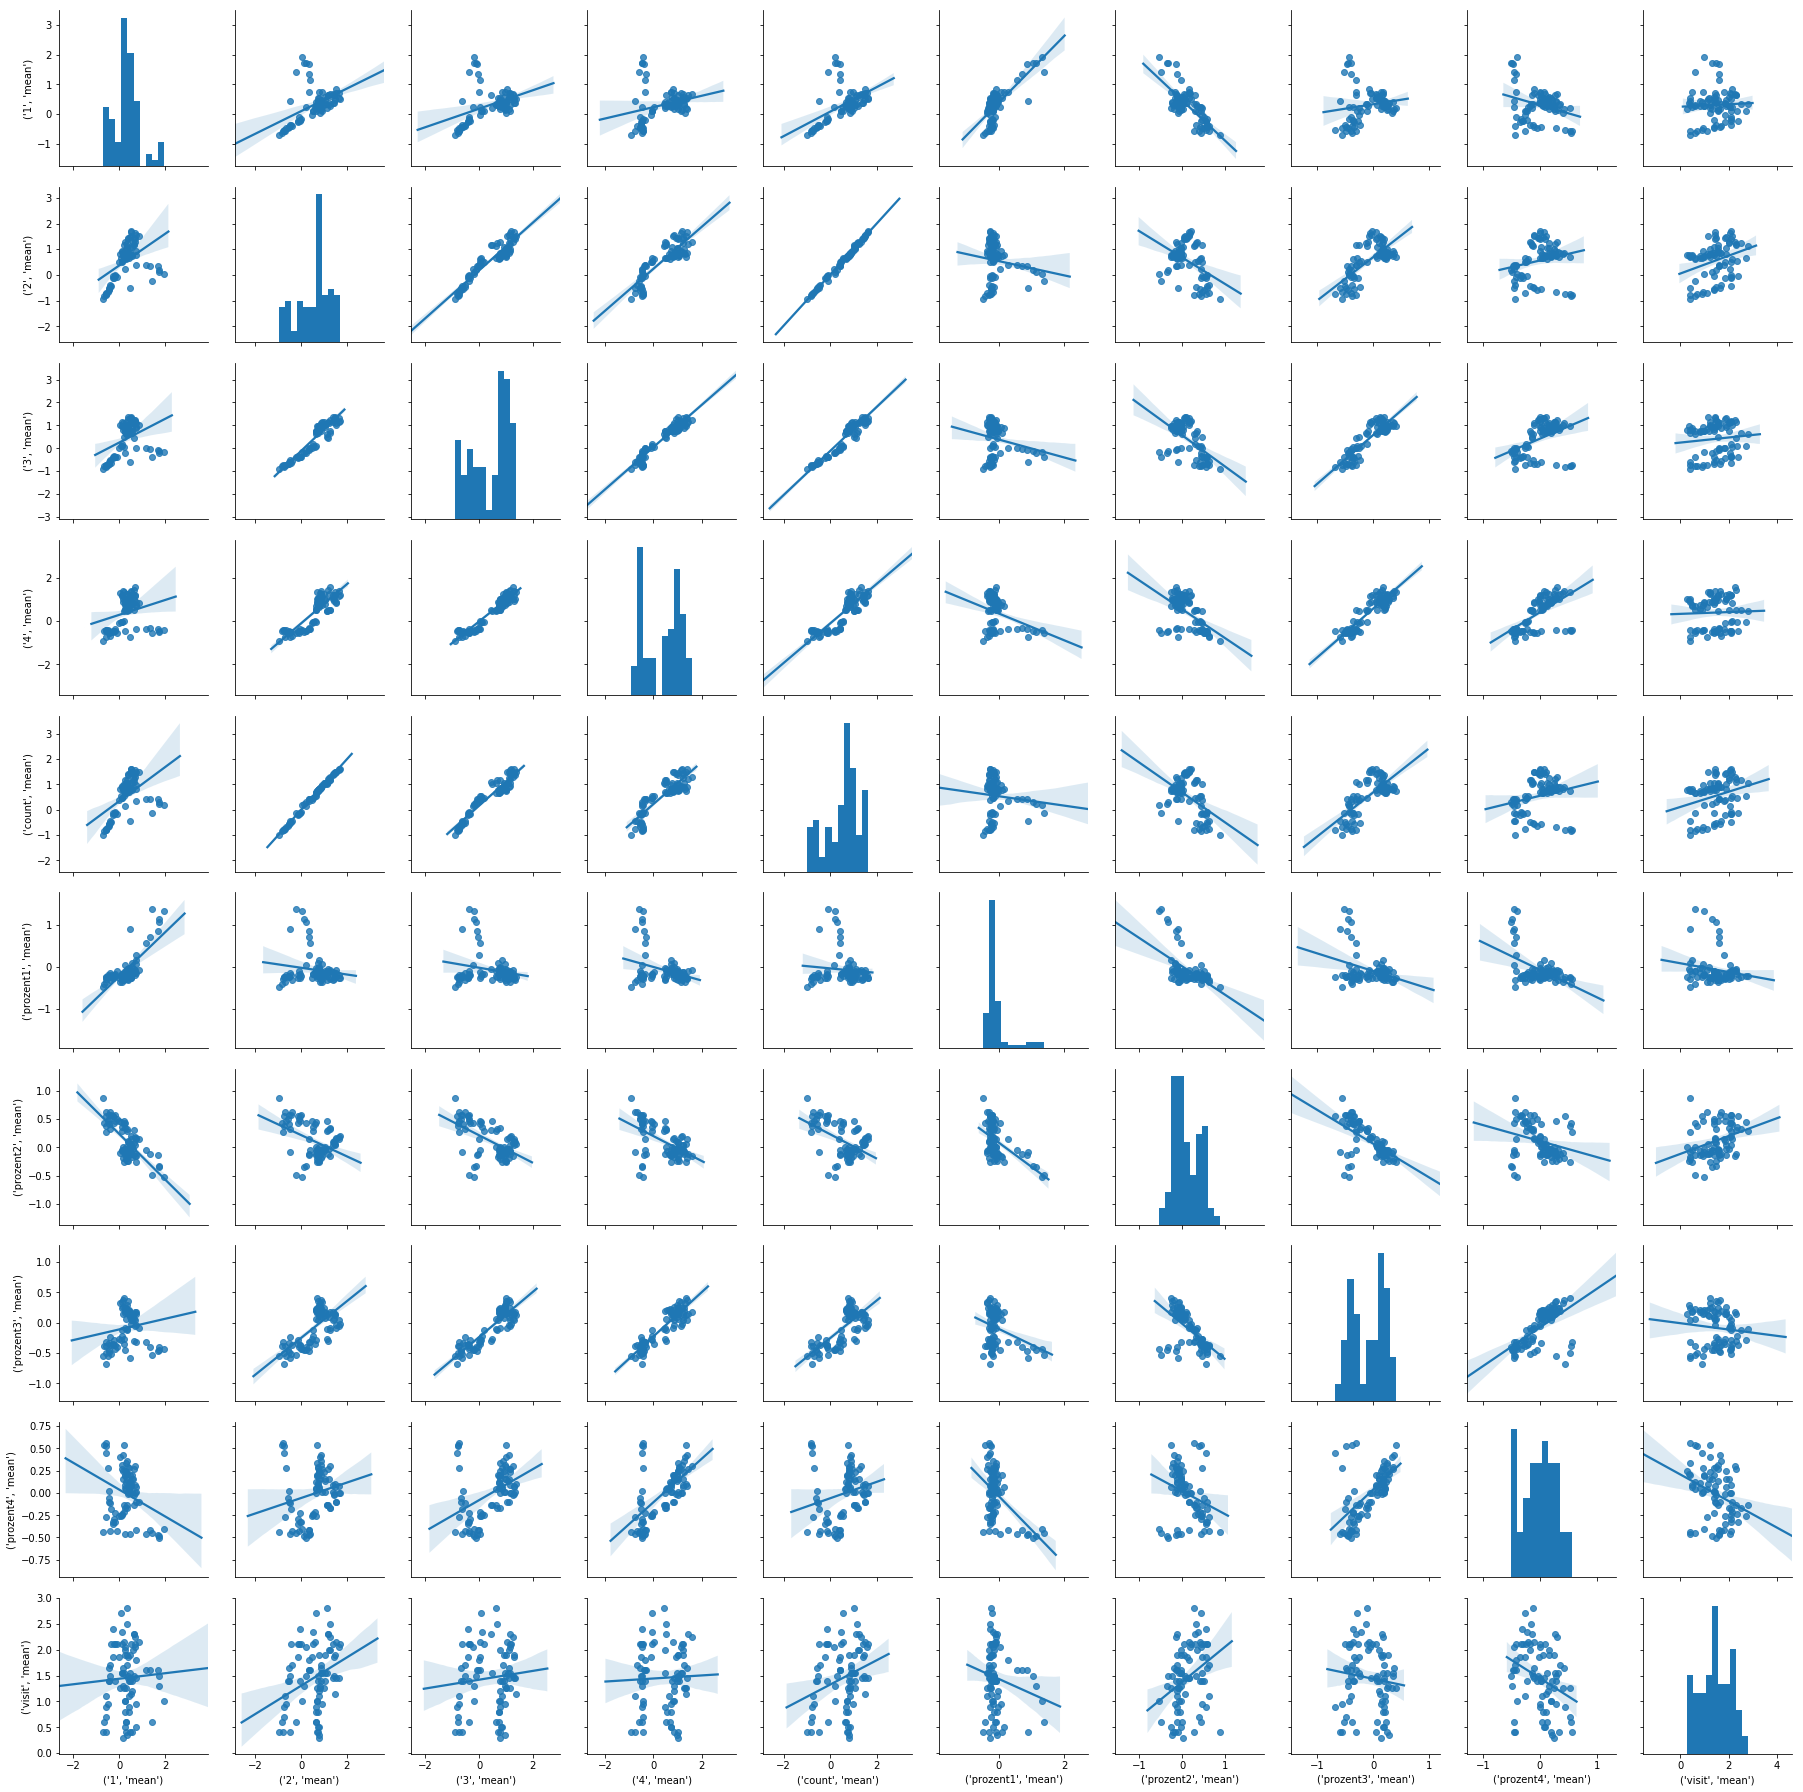

In [658]:
sns.pairplot(data_means_penny, kind="reg")
plt.show()

# Correlation Shopping at Supermarkets in Town

In [659]:
sum_supermarkets = data_penny.add(data_netto, axis='columns', level=None, fill_value=None)

In [660]:
sum_supermarkets.head()

weekday     h  visit
0        2  14.0    0.8
1        2  16.0    1.2
2        2  18.0    1.8
3        2  20.0    2.3
4        2  22.0    2.7

In [661]:
result_sum = pd.merge(data, sum_supermarkets, on=['weekday', 'h'])

In [662]:
result_sum.head()

h         1         2         3         4     count  prozent1  prozent2  \
0  14  1.285101  2.064149  0.894925  0.293713  1.923015  0.002965  0.363165   
1  14  0.020402  1.798445  0.797732  0.482172  1.578077 -0.524323  0.653776   
2  14  0.399811  1.540333  0.700539  0.482172  1.393289 -0.290806  0.460172   
3  14  1.411571  1.806036  0.360362  0.293713  1.658152  0.149378  0.418683   
4  14 -0.232538  1.244263 -0.271394  0.105254  0.955957 -0.573273  1.108150   

   prozent3  prozent4  weekday  visit  
0 -0.336061 -0.408710        6    0.5  
1 -0.263885 -0.269222        6    0.5  
2 -0.249234 -0.225563        6    0.5  
3 -0.575371 -0.364159        6    0.5  
4 -0.824586 -0.297433        6    0.5

In [663]:
data_weekday_stats_sum = result_sum.groupby(['weekday', 'h']).describe()
data_weekday_stats_sum.head()

1                                                              \
           count      mean       std       min       25%       50%       75%   
weekday h                                                                      
2       14  35.0  0.627457  1.004316 -0.611948 -0.011216  0.526281  1.000544   
        16  35.0  0.193846  0.556861 -0.801653 -0.200921  0.336576  0.621134   
        18  35.0 -0.281320  0.398485 -0.801653 -0.548713 -0.485478  0.083636   
        20  35.0 -0.655309  0.112463 -0.801653 -0.738418 -0.675183 -0.611948   
        22  35.0 -0.761906  0.063394 -0.801653 -0.801653 -0.801653 -0.738418   

                         2           ...   prozent4           visit            \
                 max count      mean ...        75%       max count mean  std   
weekday h                            ...                                        
2       14  4.510085  35.0  1.455091 ...   0.152443  0.516786  35.0  0.8  0.0   
        16  1.221866  35.0  1.151429 ...  -0.029748  1.030942  35.0  1.2  0.0   
        18  0.715986  35.0 -0.139566 ...  -0.177974  0.323944  35.0  1.8  0.0   
        20 -0.359008  35.0 -0.816297 ...   0.875430  1.972986  35.0  2.3  0.0   
        22 -0.485478  35.0 -1.201948 ...   1.510812  8.455423  35.0  2.7  0.0   

                                     
            min  25%  50%  75%  max  
weekday h                            
2       14  0.8  0.8  0.8  0.8  0.8  
        16  1.2  1.2  1.2  1.2  1.2  
        18  1.8  1.8  1.8  1.8  1.8  
        20  2.3  2.3  2.3  2.3  2.3  
        22  2.7  2.7  2.7  2.7  2.7  

[5 rows x 80 columns]

In [664]:
data_means_sum = data_weekday_stats_sum[[('2', 'mean'),('count', 'mean'),('visit', 'mean')]]

In [665]:
data_means_sum[('visit', 'mean')].unique()

array([0.79999995, 1.20000017, 1.79999983, 2.30000019, 2.69999981,
       0.70000011, 1.0999999 , 2.30000043, 2.69999957, 0.5       ,
       1.        , 1.5       , 1.94999981, 2.25      ])

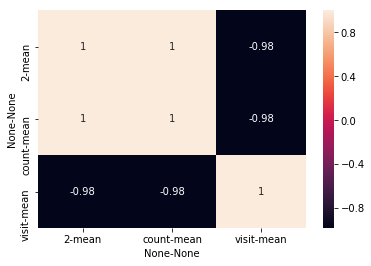

In [666]:
# correlation map, no processing needed
f,ax = plt.subplots()
sns.heatmap(data_means_sum.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
plt.show()

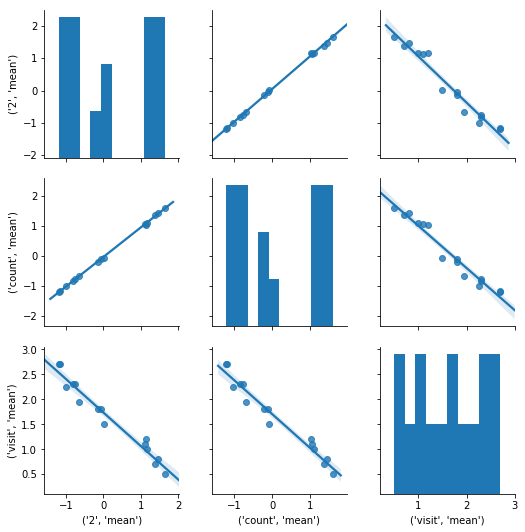

In [667]:
sns.pairplot(data_means_sum, kind="reg")
plt.show()

In [668]:
data_means_sum.columns

MultiIndex(levels=[['1', '2', '3', '4', 'count', 'prozent1', 'prozent2', 'prozent3', 'prozent4', 'visit'], ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']],
           labels=[[1, 4, 9], [1, 1, 1]])

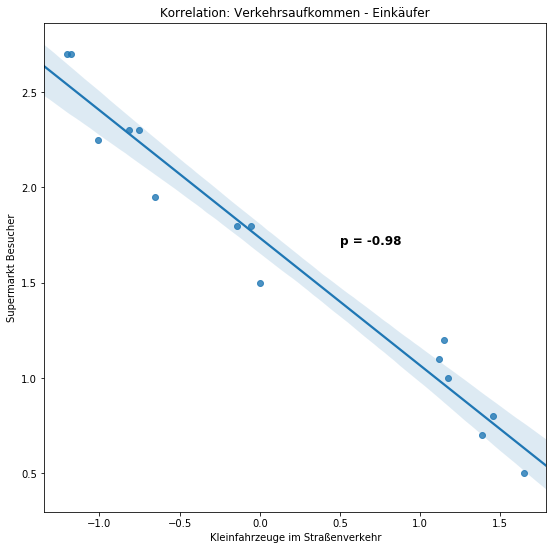

In [669]:
f,ax = plt.subplots(figsize=(9, 9))
p1 = sns.regplot(data_means_sum[('2', 'mean')], data_means_sum[('visit', 'mean')])
p1.text(0.5, 1.7, "p = -0.98", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.xlabel('Kleinfahrzeuge im Straßenverkehr')
plt.ylabel('Supermarkt Besucher')
plt.title('Korrelation: Verkehrsaufkommen - Einkäufer')
plt.savefig("korrelation_verkehr_einkaufen", format='pdf')
plt.show()

# Correlation Gas Station 'Aral' 

In [670]:
result_tankstelle = pd.merge(data, data_tankstelle, on=['weekday', 'h'])

In [671]:
data_weekday_stats_tankstelle = result_tankstelle.groupby(['weekday', 'h']).describe()
data_weekday_stats_tankstelle.head()

1                                                              \
           count      mean       std       min       25%       50%       75%   
weekday h                                                                      
1       7   35.0  0.450399  1.174918 -0.801653 -0.517096 -0.169303  1.190249   
        8   35.0  1.418798  1.834441 -0.738418 -0.074451  0.589516  3.087298   
        9   35.0  1.931905  2.373435 -0.675183 -0.106068  0.652751  4.541703   
        10  35.0  1.716906  2.235667 -0.611948 -0.232538  0.842456  3.340238   
        11  35.0  1.725939  2.214791 -0.738418 -0.169303  0.589516  3.403473   

                         2            ...   prozent4           visit        \
                 max count      mean  ...        75%       max count  mean   
weekday h                             ...                                    
1       7   2.929211  35.0 -0.502658  ...  -0.370467  0.262342  35.0  0.25   
        8   5.015965  35.0 -0.225459  ...  -0.292888 -0.034169  35.0  0.95   
        9   6.027725  35.0  0.045450  ...  -0.219023  0.149927  35.0  1.75   
        10  6.470369  35.0  0.116594  ...  -0.332765 -0.115419  35.0  2.50   
        11  6.660074  35.0  0.203354  ...  -0.315913 -0.163977  35.0  2.80   

                                               
            std   min   25%   50%   75%   max  
weekday h                                      
1       7   0.0  0.25  0.25  0.25  0.25  0.25  
        8   0.0  0.95  0.95  0.95  0.95  0.95  
        9   0.0  1.75  1.75  1.75  1.75  1.75  
        10  0.0  2.50  2.50  2.50  2.50  2.50  
        11  0.0  2.80  2.80  2.80  2.80  2.80  

[5 rows x 80 columns]

In [672]:
data_means_tankstelle = data_weekday_stats_tankstelle[[('1', 'mean'),('2', 'mean'), ('3', 'mean'), ('4', 'mean'),('count', 'mean'), ('prozent1', 'mean'), ('prozent2', 'mean'), ('prozent3', 'mean'), ('prozent4', 'mean'), ('visit', 'mean')]]

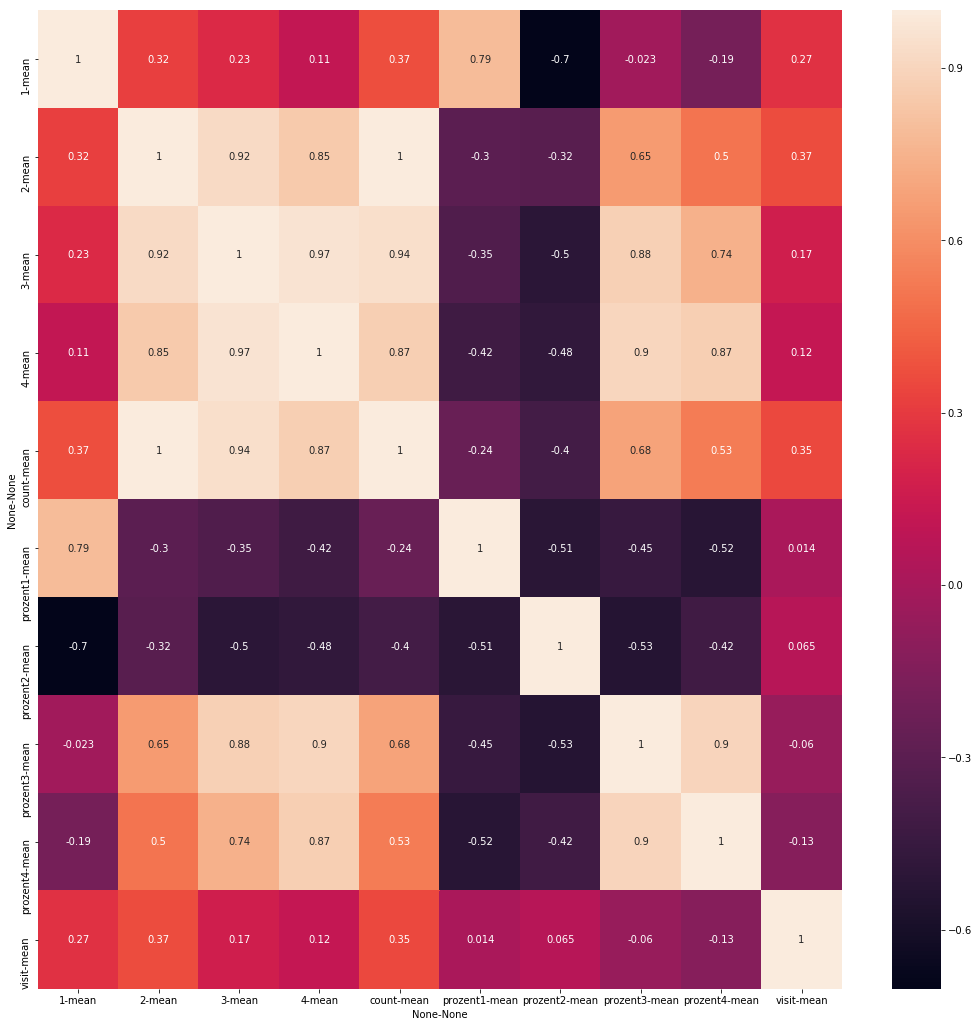

In [673]:
# correlation map, no processing needed
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_means_tankstelle.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
plt.show()

In [674]:
data_means_tankstelle.dtypes

1         mean    float64
2         mean    float64
3         mean    float64
4         mean    float64
count     mean    float64
prozent1  mean    float64
prozent2  mean    float64
prozent3  mean    float64
prozent4  mean    float64
visit     mean    float64
dtype: object

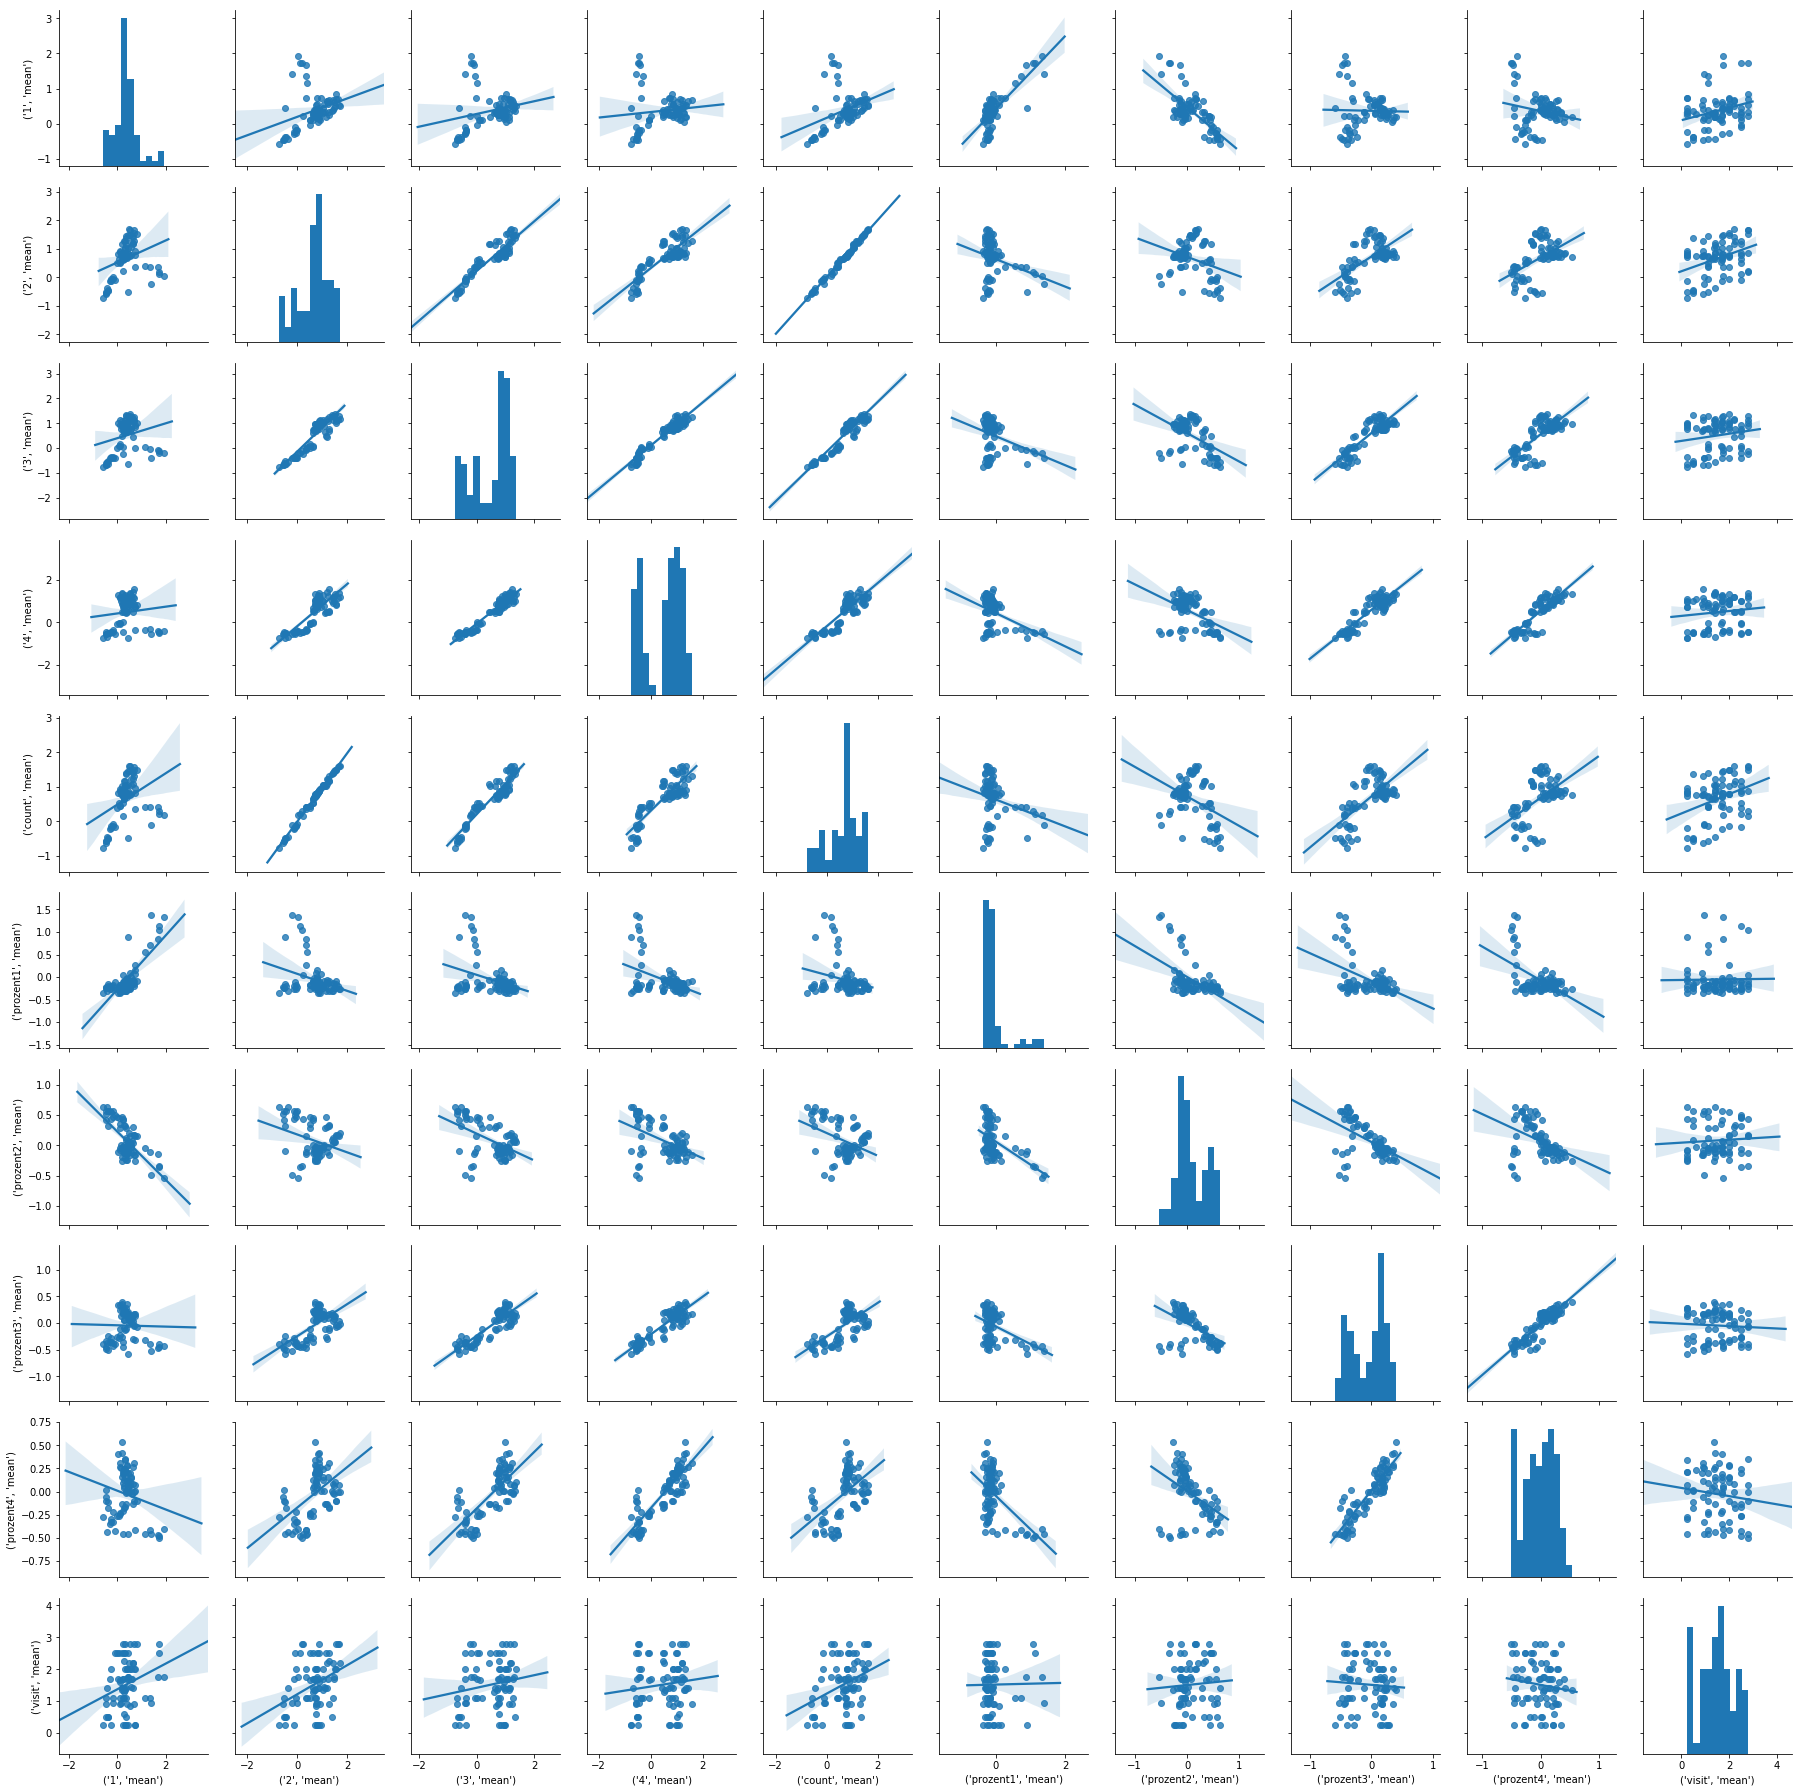

In [675]:
sns.pairplot(data_means_tankstelle,kind="reg")
plt.show()

In [676]:
result_tankstelle2 = pd.merge(data.where((data['h'] != 8) & (data['h'] != 19) & (data['h'] != 9)), data_tankstelle, on=['weekday', 'h'])

In [677]:
data_weekday_stats_tankstelle2 = result_tankstelle2.groupby(['weekday', 'h']).describe()
data_weekday_stats_tankstelle2.head()

1                                                    \
             count      mean       std       min       25%       50%   
weekday h                                                              
1.0     7.0   35.0  0.450399  1.174918 -0.801653 -0.517096 -0.169303   
        10.0  35.0  1.716906  2.235667 -0.611948 -0.232538  0.842456   
        11.0  35.0  1.725939  2.214791 -0.738418 -0.169303  0.589516   
        12.0  35.0  1.673545  2.269689 -0.801653 -0.074451  0.652751   
        13.0  35.0  1.348336  1.709341 -0.675183 -0.137686  0.905691   

                                     2            ...   prozent4            \
                   75%       max count      mean  ...        75%       max   
weekday h                                         ...                        
1.0     7.0   1.190249  2.929211  35.0 -0.502658  ...  -0.370467  0.262342   
        10.0  3.340238  6.470369  35.0  0.116594  ...  -0.332765 -0.115419   
        11.0  3.403473  6.660074  35.0  0.203354  ...  -0.315913 -0.163977   
        12.0  2.929211  7.988009  35.0  0.358656  ...  -0.344847 -0.075785   
        13.0  2.581418  5.838020  35.0  0.363644  ...  -0.165778  0.357243   

             visit                                           
             count  mean  std   min   25%   50%   75%   max  
weekday h                                                    
1.0     7.0   35.0  0.25  0.0  0.25  0.25  0.25  0.25  0.25  
        10.0  35.0  2.50  0.0  2.50  2.50  2.50  2.50  2.50  
        11.0  35.0  2.80  0.0  2.80  2.80  2.80  2.80  2.80  
        12.0  35.0  1.75  0.0  1.75  1.75  1.75  1.75  1.75  
        13.0  35.0  1.10  0.0  1.10  1.10  1.10  1.10  1.10  

[5 rows x 80 columns]

In [678]:
data_means_tankstelle2 = data_weekday_stats_tankstelle2[[('1', 'mean'),('2', 'mean'), ('3', 'mean'), ('4', 'mean'),('count', 'mean'), ('prozent1', 'mean'), ('prozent2', 'mean'), ('prozent3', 'mean'), ('prozent4', 'mean'), ('visit', 'mean')]]

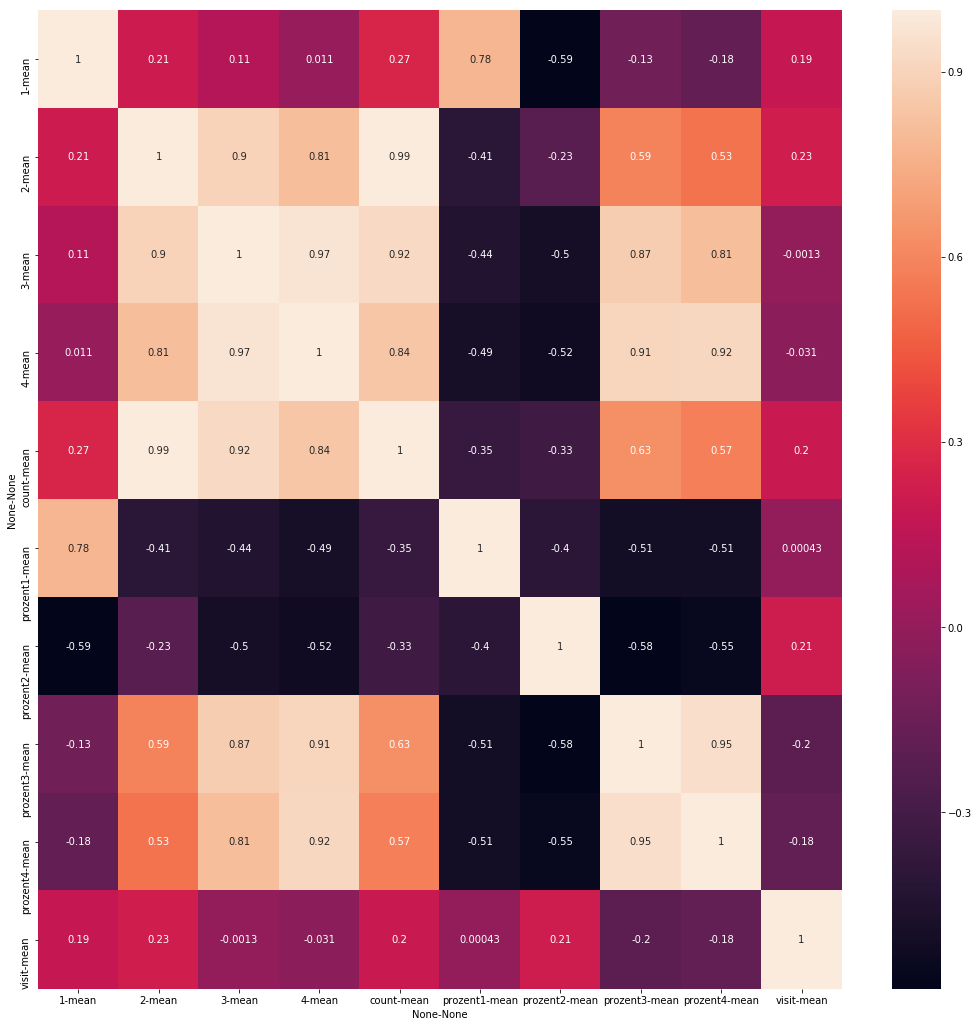

In [679]:
# correlation map, no processing needed
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_means_tankstelle2.corr(), annot=True)
#plt.savefig("figures/correlation_map", format='pdf')
plt.show()

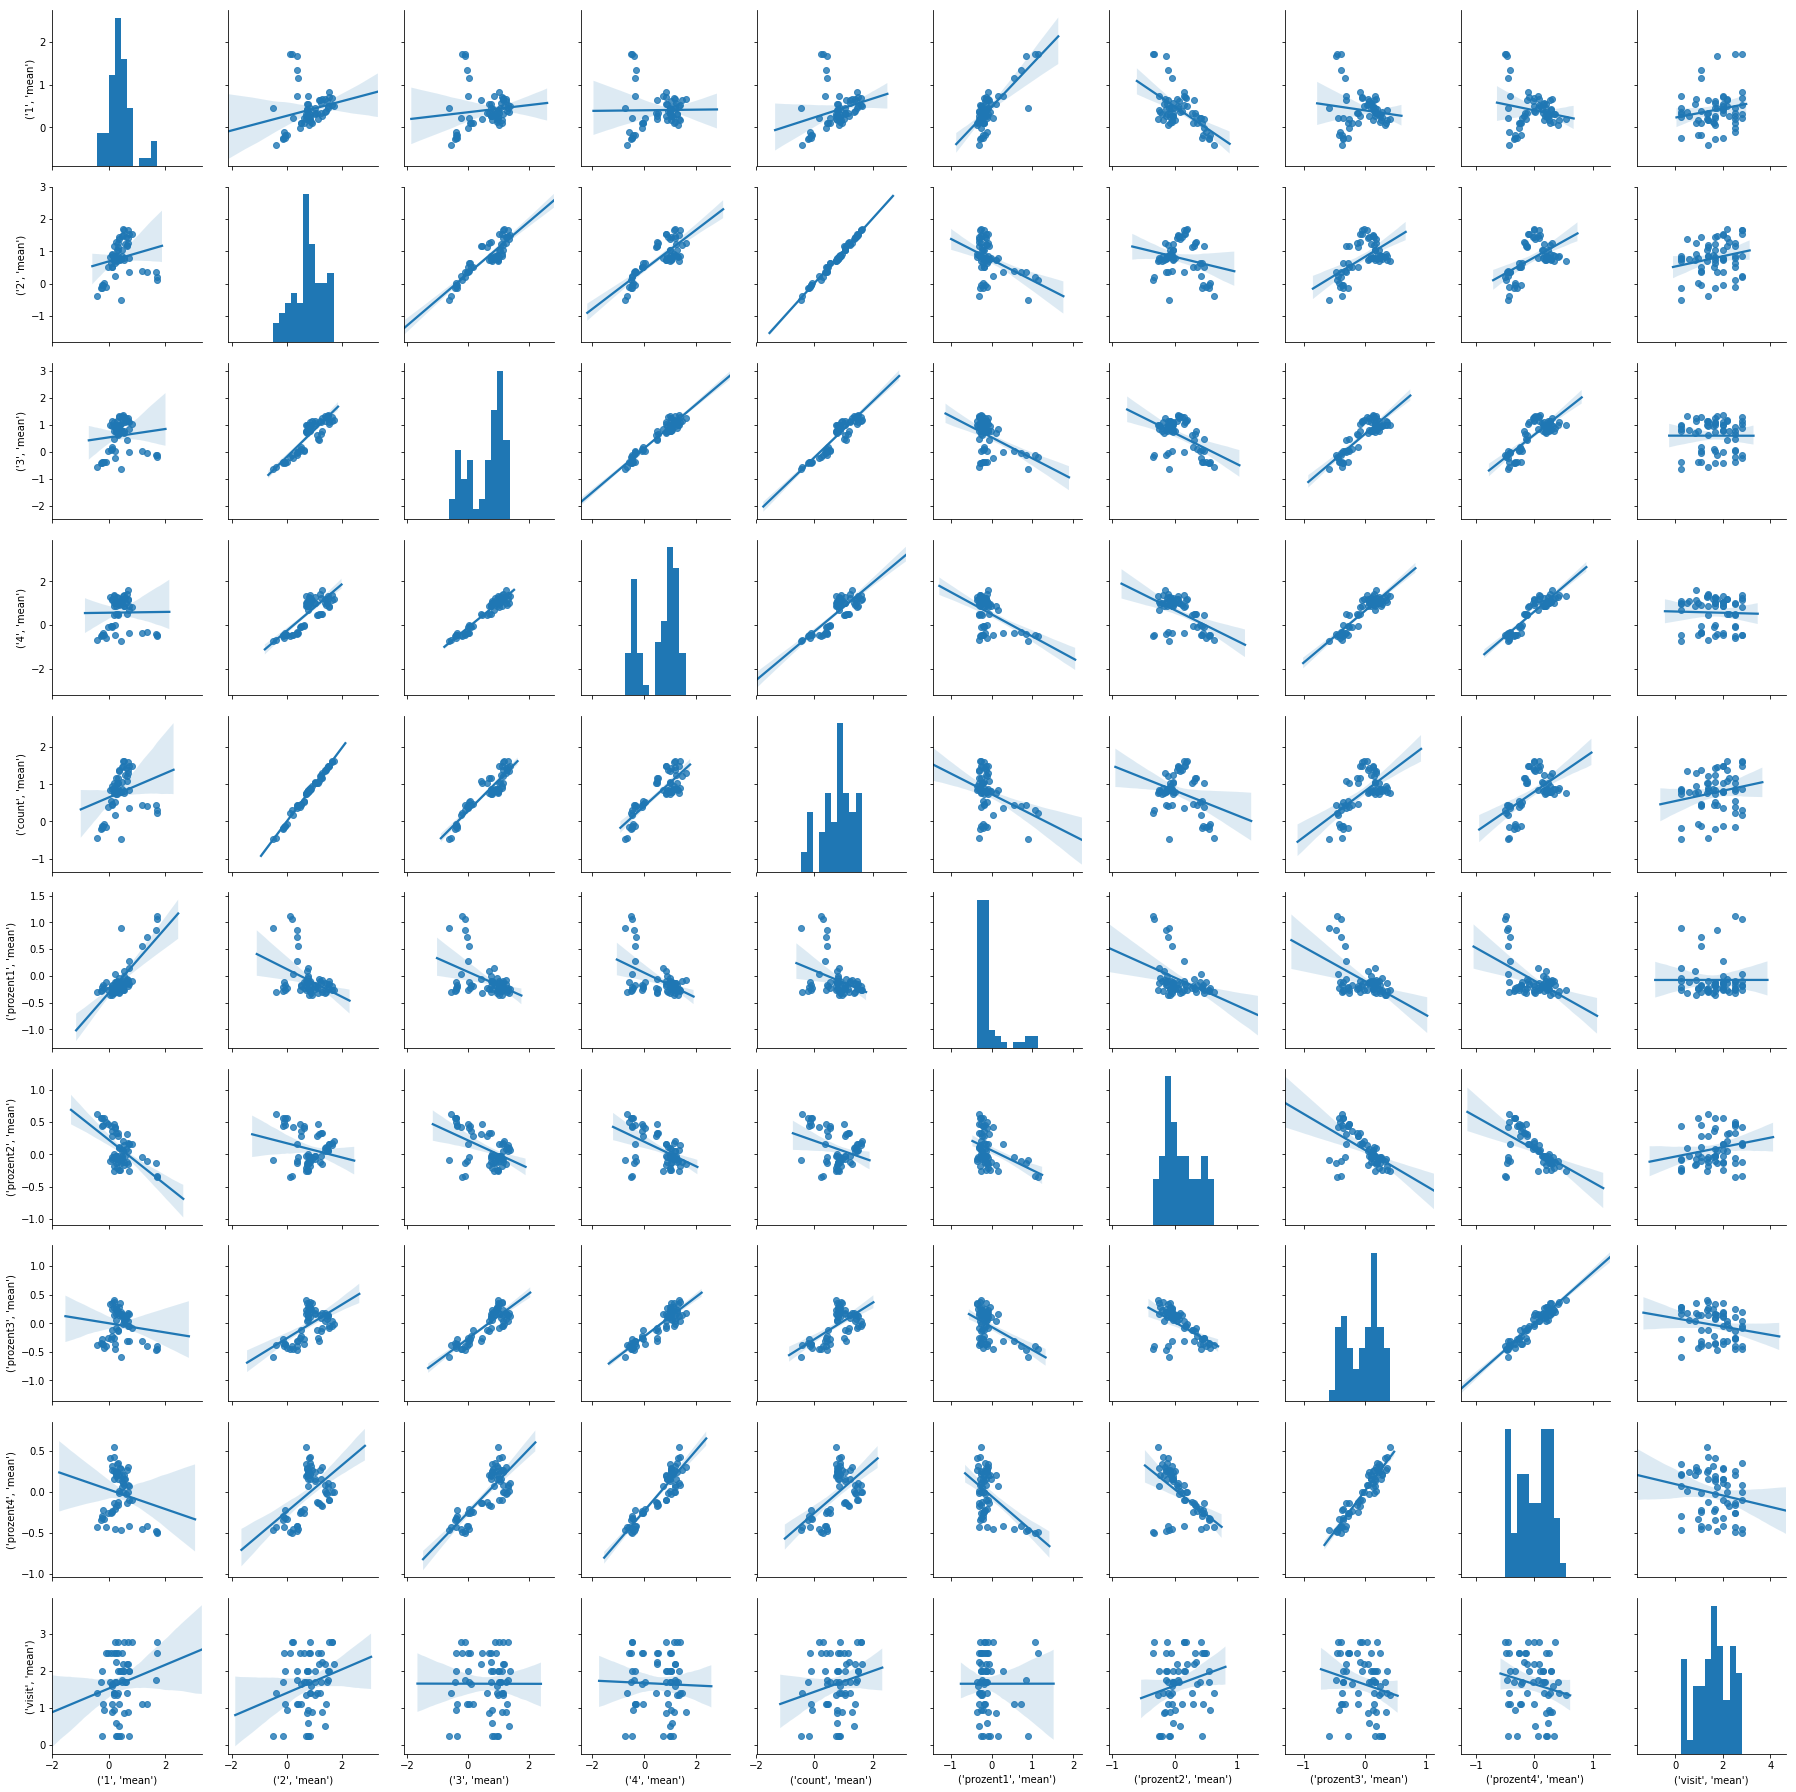

In [680]:
sns.pairplot(data_means_tankstelle2, kind="reg")
plt.show()

# Correlation Tourism

In [681]:
data = pd.read_csv('features_normalized.csv')
data2 = data.drop(['Unnamed: 0', 'Unnamed: 0.1','datum', 'y', 'd', 'prozent1', 'prozent2', 'prozent3', 'prozent4'], axis=1)

In [682]:
data2.head()

m  h         1         2         3         4     count   Tourism  \
0  12  0 -0.801653 -1.260945 -1.048941 -1.025500 -1.267660 -0.098199   
1  12  1 -0.675183 -1.260945 -1.048941 -1.025500 -1.255341 -0.098199   
2  12  2 -0.738418 -1.238170 -1.048941 -1.025500 -1.243022 -0.098199   
3  12  3 -0.422243 -1.162255 -0.903151 -1.025500 -1.132149 -0.098199   
4  12  4  0.336576 -0.600481 -0.708764  0.105254 -0.540827 -0.098199   

      Cloud      Rain  weekday  
0  0.385617 -0.116396        6  
1  0.711228 -0.116396        6  
2  0.711228 -0.116396        6  
3  0.711228 -0.116396        6  
4  0.711228 -0.116396        6

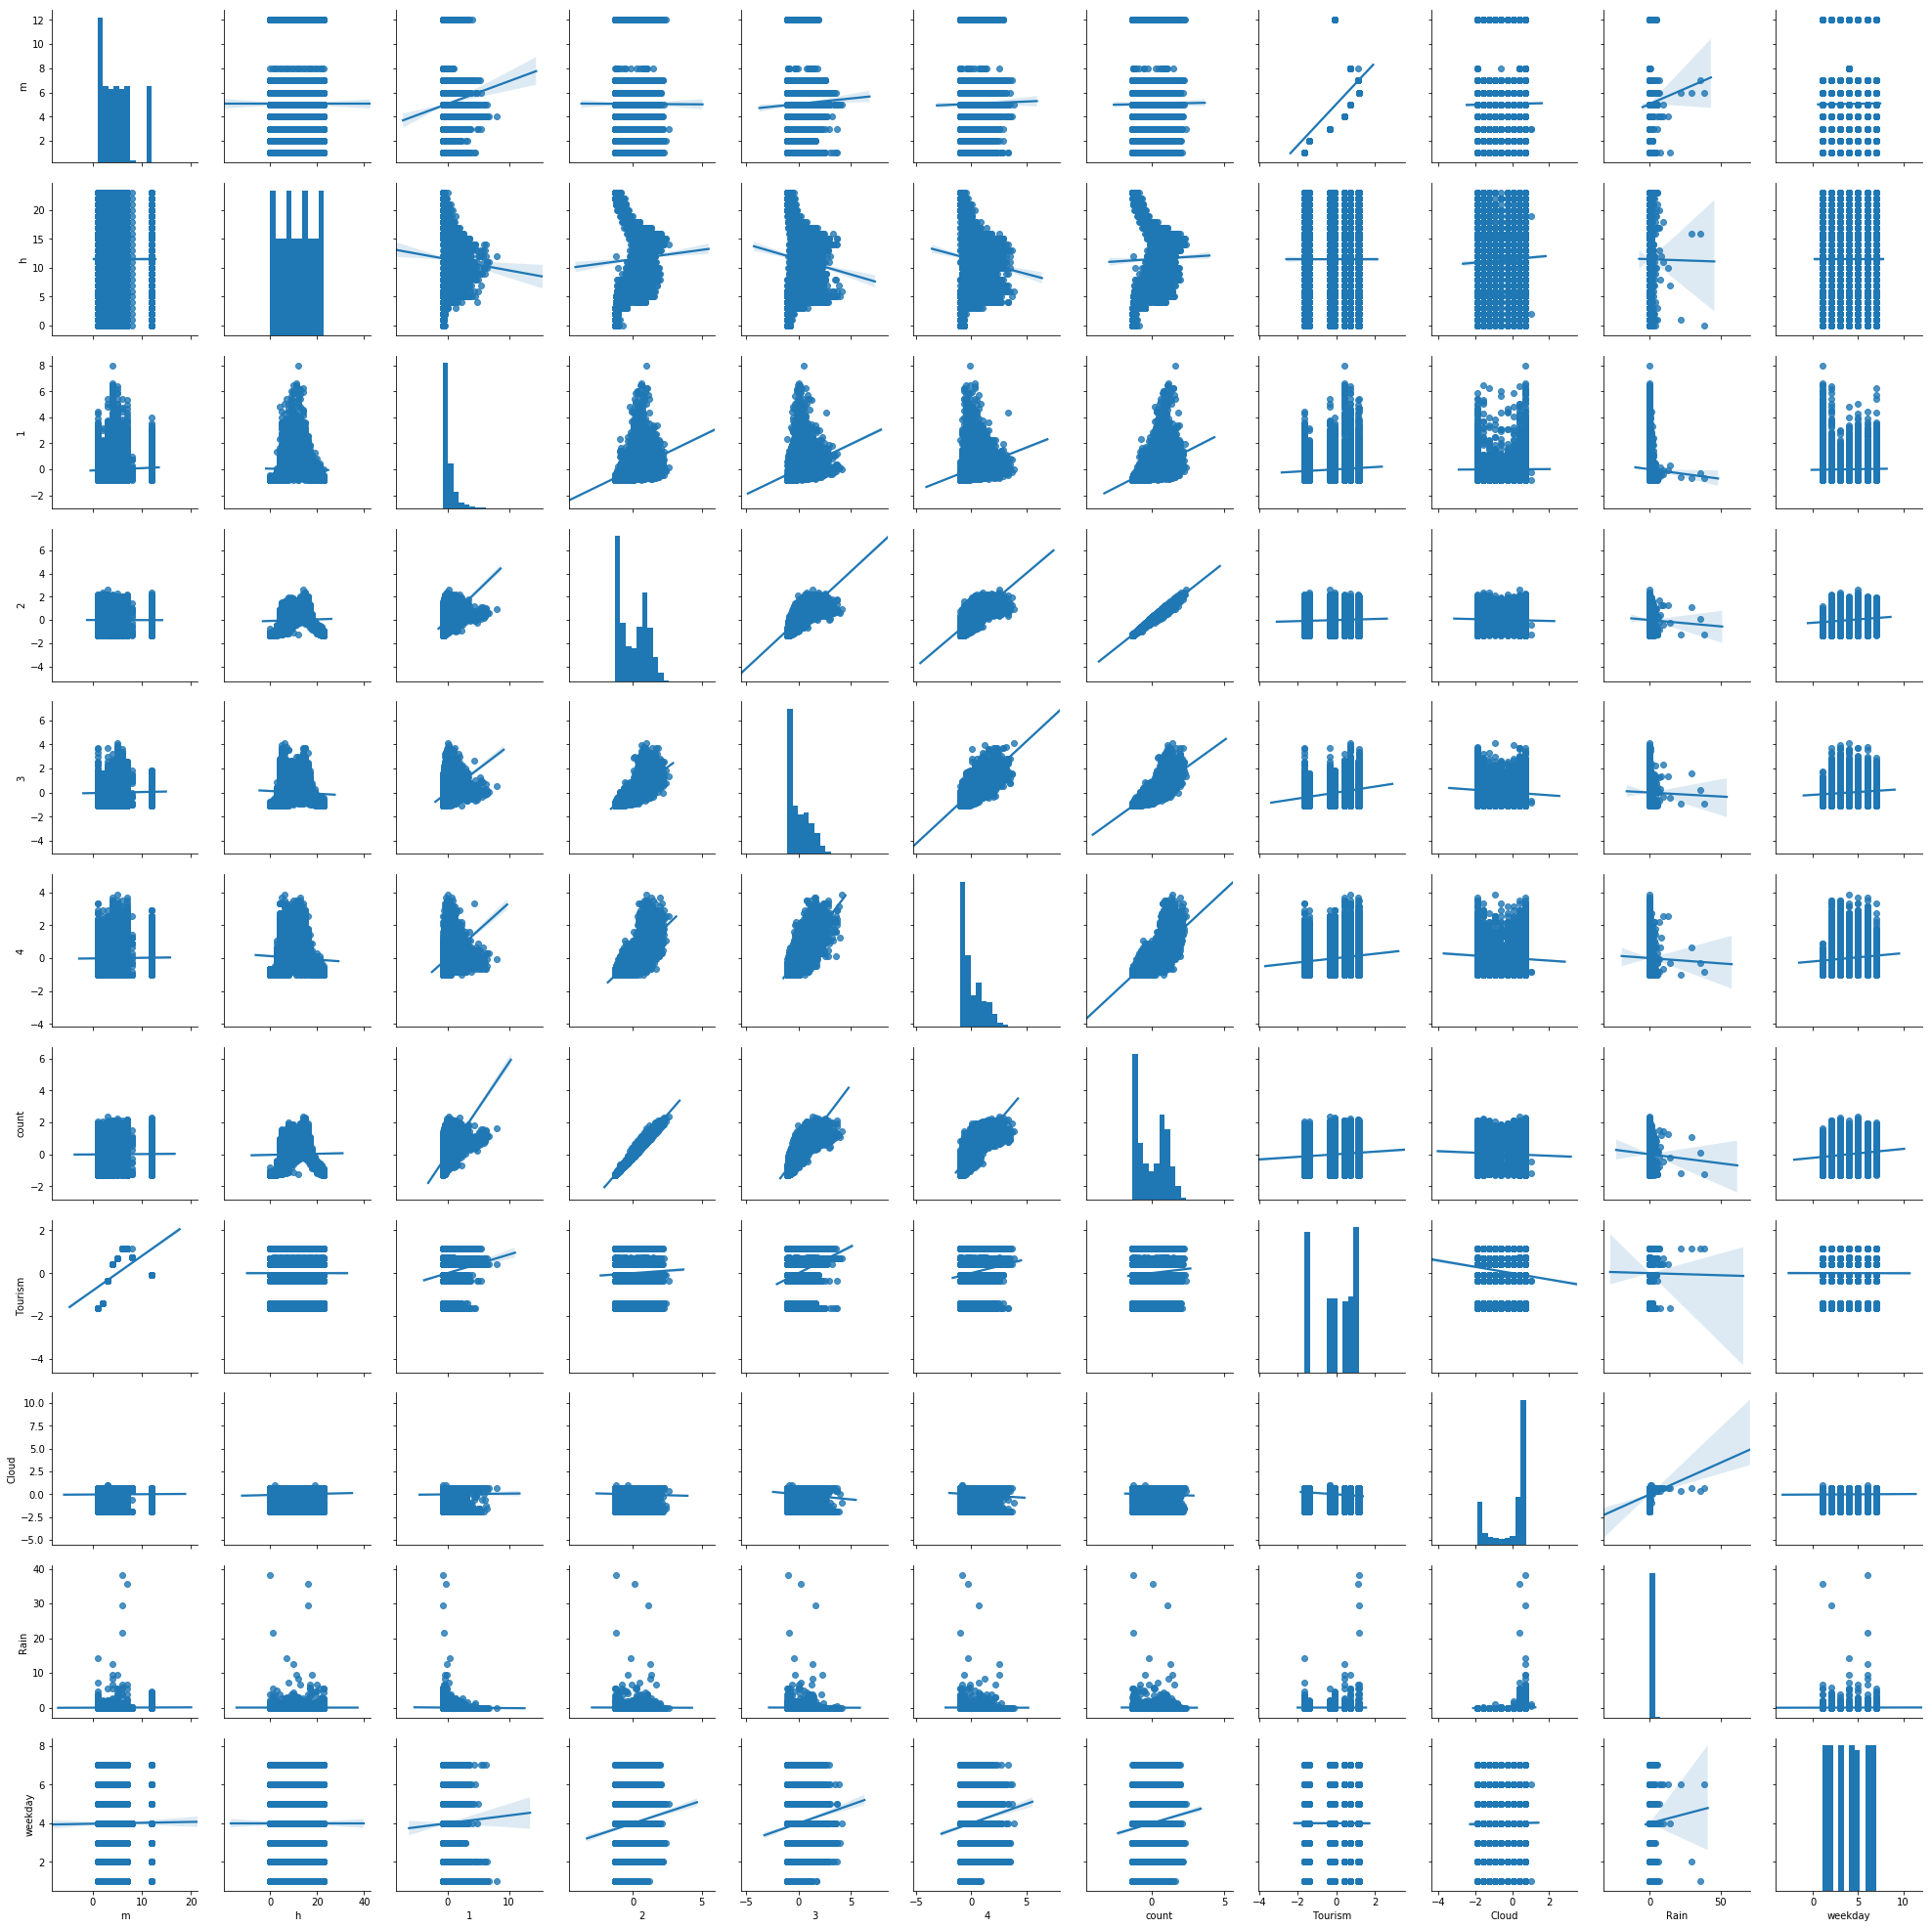

In [683]:
sns.pairplot(data2, kind="reg")
plt.show()

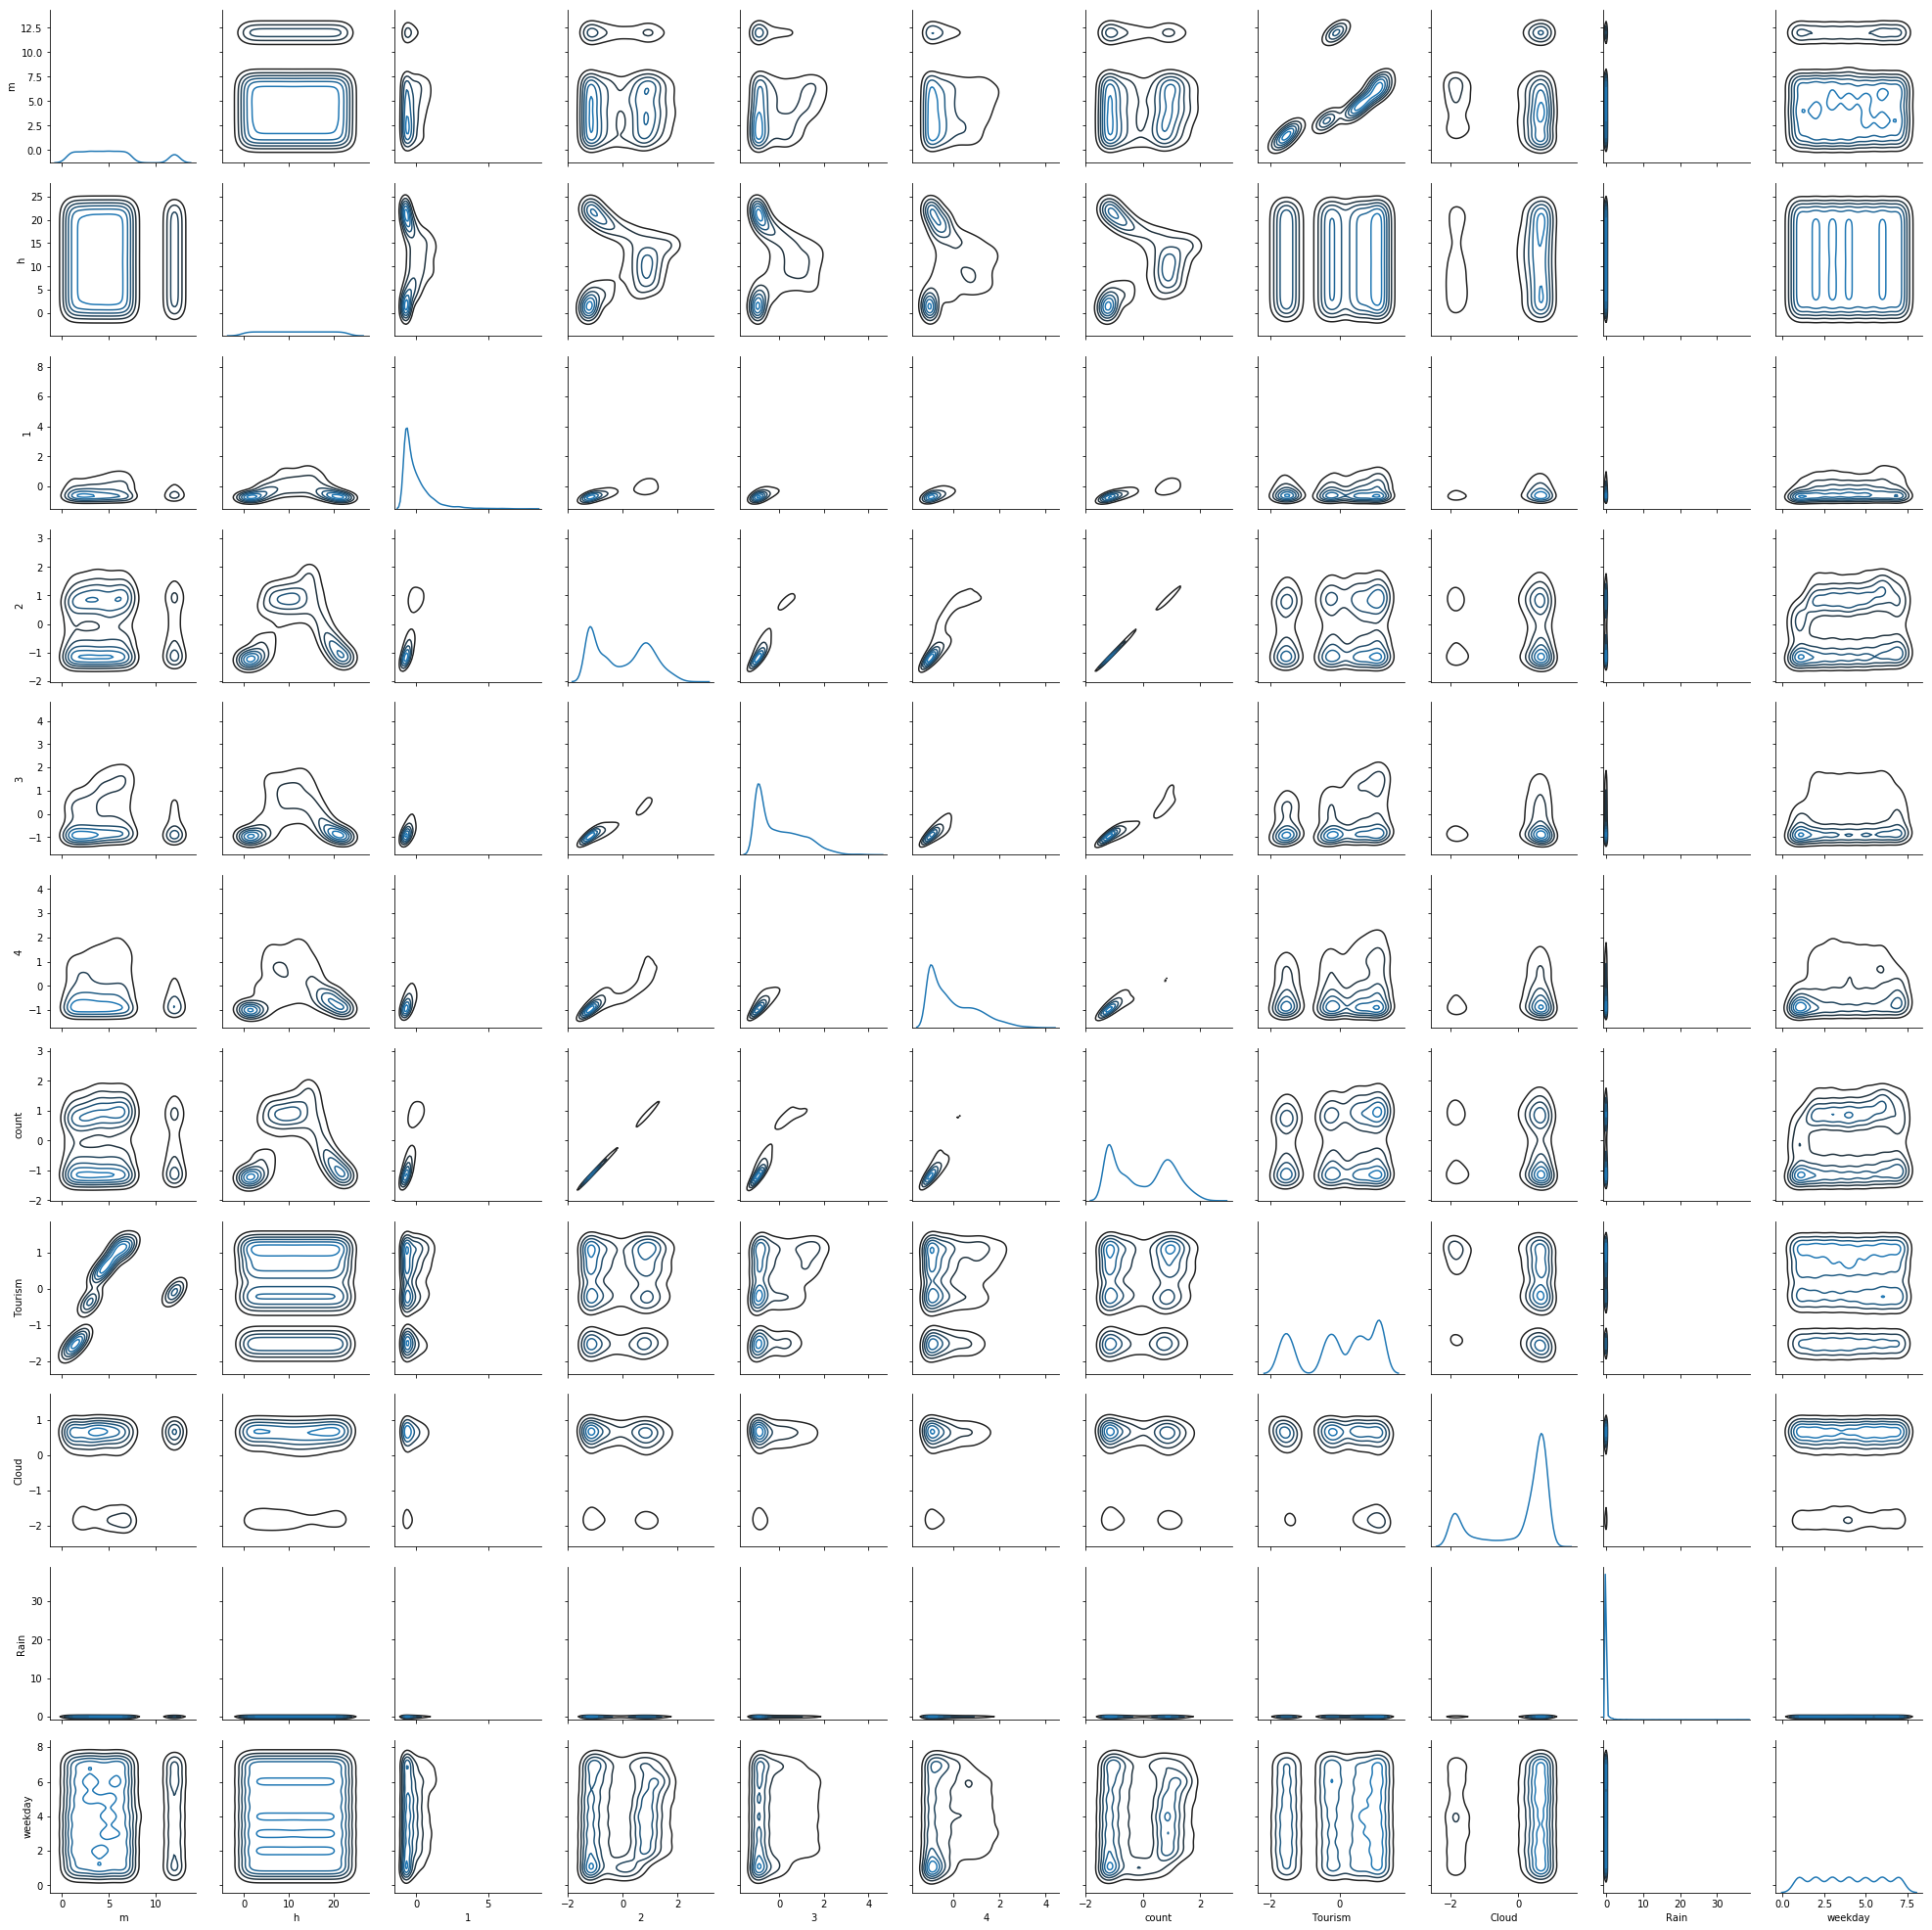

In [684]:
g = sns.PairGrid(data2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6)
plt.show()

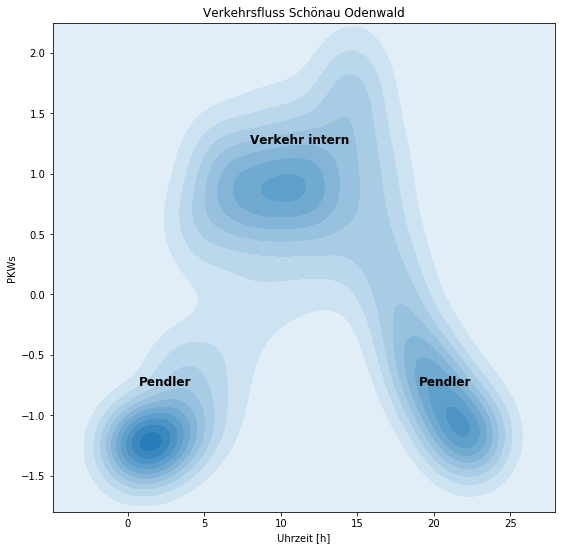

In [685]:
f,ax = plt.subplots(figsize=(9, 9))
p1 = sns.kdeplot(data2['h'], data2['2'], shade=True)
p1.text(0.75, -0.75, "Pendler", horizontalalignment='left', size='large', color='black', weight='semibold')
p1.text(8.0, 1.25, "Verkehr intern", horizontalalignment='left', size='large', color='black', weight='semibold')
p1.text(19.0, -0.75, "Pendler", horizontalalignment='left', size='large', color='black', weight='semibold')
plt.xlabel('Uhrzeit [h]')
plt.ylabel('PKWs')
plt.ylim((-1.8, 2.25))
plt.title('Verkehrsfluss Schönau Odenwald')
plt.savefig("verkehrsfluss", format='pdf')
plt.show()

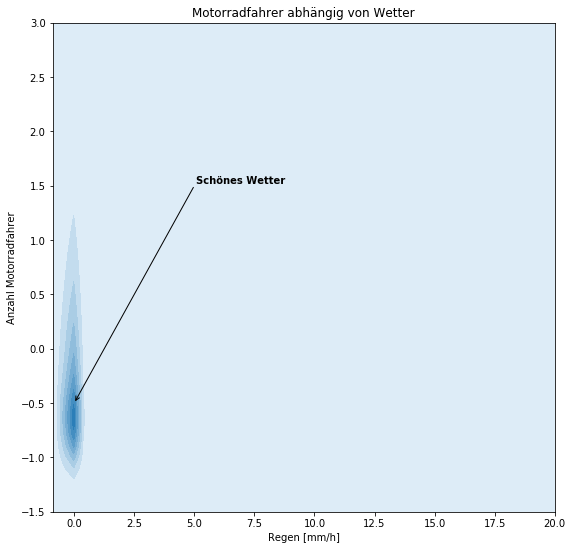

In [686]:
f,ax = plt.subplots(figsize=(9, 9))
p1 = sns.kdeplot(data2['Rain'], data2['1'], shade=True)
#p1.text(-2.0, -0.75, "Pendler raus", horizontalalignment='left', size='large', color='black', weight='semibold')
#p1.text(8.0, 1.5, "Interner Verkehr", horizontalalignment='left', size='large', color='black', weight='semibold')
p1.text(5.05, 1.525, "Schönes Wetter", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.xlabel('Regen [mm/h]')
plt.ylabel('Anzahl Motorradfahrer')
plt.ylim((-1.5, 3))
plt.xlim((-0.9, 20))
ax.annotate("", xy=(5, 1.5), xytext=(0, -0.5), arrowprops=dict(arrowstyle="<-"))
plt.title('Motorradfahrer abhängig von Wetter')
plt.savefig("motorradfahrer_wetter", format='pdf')
plt.show()

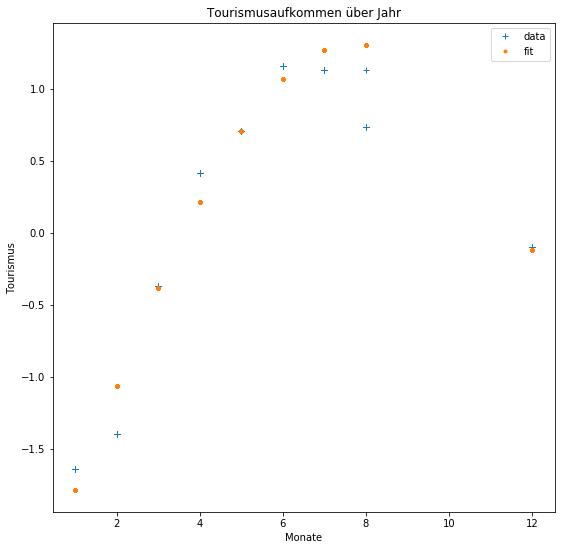

In [688]:
x = data2['m'].values
y = data2['Tourism'].values

n = len(x)                          #the number of data
mean = 3                  #note this correction
sigma = 2        #note this correction
c = -1.5

def gaus(x,a,x0,sigma,c):
    return a*exp(-(x-x0)**2/(2*sigma**2))-c

popt,pcov = curve_fit(gaus,x,y,p0=[1,mean,sigma,c])

f,ax = plt.subplots(figsize=(9, 9))
plt.plot(x,y,'+',label='data')
plt.plot(x,gaus(x,*popt),'.',label='fit')
plt.legend()
plt.xlabel('Monate')
plt.ylabel('Tourismus')
plt.title('Tourismusaufkommen über Jahr')
plt.savefig("tourismusaufkommen", format='pdf')
plt.show()